# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 26.09.2021

Мягкий дедлайн: 23:59MSK 11.10.2021

Жесткий дедлайн: 23:59MSK 14.10.2021

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [1]:
#!pip install folium

In [2]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [4]:
#!pip install kaggle

In [5]:
#!kaggle competitions download -c nyc-taxi-trip-duration -f train.zip
df = pd.read_csv('train.zip')
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [6]:
df.drop(columns = ['dropoff_datetime'], inplace = True)

In [7]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, format = '%Y-%m-%d %H:%M:%S')

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

In [8]:
%pylab inline
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
mpl.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')

Populating the interactive namespace from numpy and matplotlib


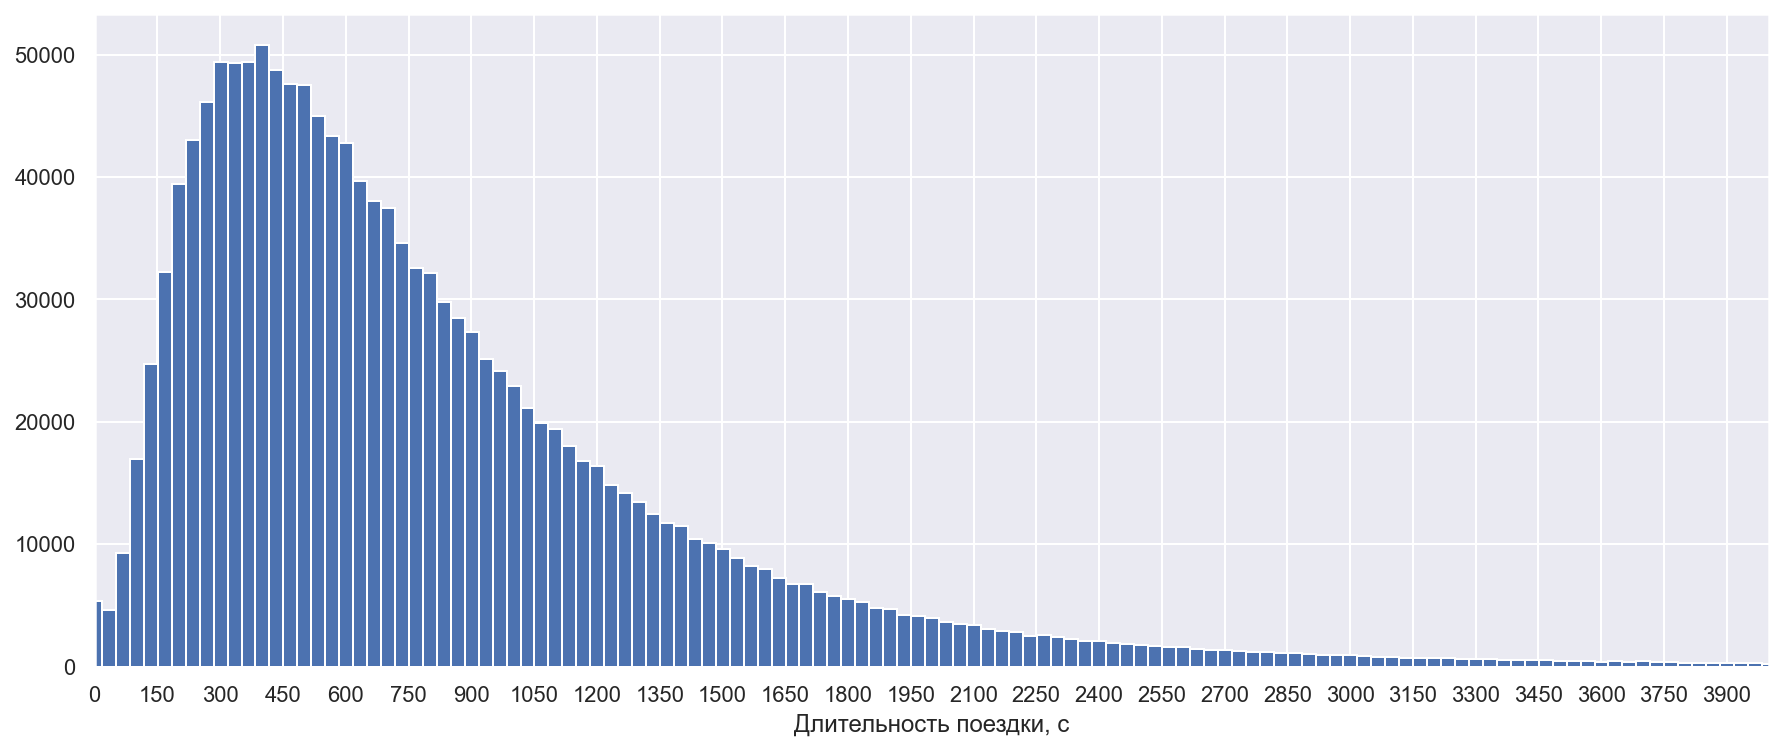

In [9]:
plt.figure(figsize = (15,6))
plt.hist(np.clip(df.trip_duration, 0, 10000), bins = 300, align = 'left') 
#обрезаем выбросы, чтобы оптимизировать код
plt.xticks(np.arange(0, 4000, 150))
plt.xlim(0, 4000)
plt.xlabel('Длительность поездки, с')
plt.title('')
plt.show()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

*По гистограмме значений можно понять, что пик значений целевой переменной лежит около 300-400 секунд, характерные значения целевой переменной лежат в диапазоне от нескольких минут до часа*

*Целевая переменная имеет выбросы, которые на графике обрезаны вручную*

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

*Есть несколько причин, по которой в данной задаче разумно использовать RMSLE:*

1) Данная функция потерь является несимметричной и штрафует за занижение прогноза сильнее, чем за завышение.

2) Метрика RMSLE как раз подходит под нашу задачу, так как наша целевая переменная неотрицательная

3) Модель склонна штрафовать за отклонение в порядке величин, нежели за отклонение самих значений

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: $$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

$$\text{MSE}(X, y, a) = {\frac{1}{\ell}\sum_{i=1}^{\ell} \big(y_i - a(x_i)\big)^2}$$

Тогда, подставляя в RMSLE модель $\hat{a}$ и целевую переменную $\hat{y}_i$ получим:

$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\hat{y}_i - \hat{a}(x_i)\big)^2}$$

Что и требовалось доказать

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

In [10]:
df['log_trip_duration'] = np.log1p(df.trip_duration)
#df.drop(columns = 'trip_duration', inplace =True) не буду удалять, потом еще пригодится

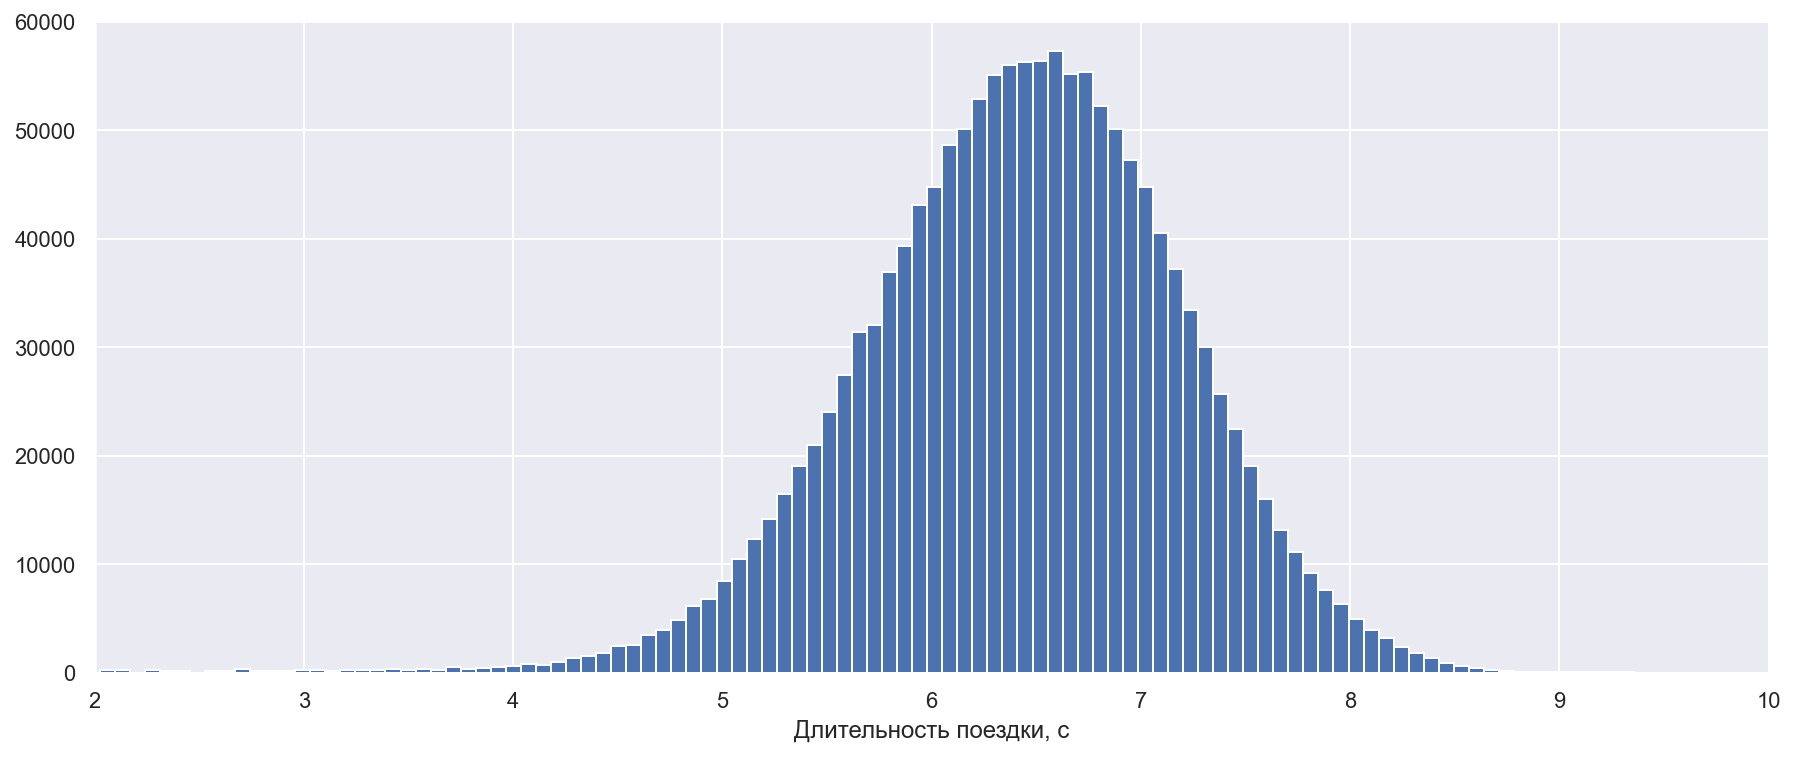

In [11]:
plt.figure(figsize = (15,6))
plt.hist(df.log_trip_duration, bins = 200, align = 'left') 
plt.xlim(2, 10)
plt.xlabel('Длительность поездки, с')
#plt.title('')
plt.show()

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [12]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(np.array(df.log_trip_duration), np.full(df.log_trip_duration.shape ,df.log_trip_duration.mean())))

0.7957592365411504

## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

In [13]:
datetime = pd.DatetimeIndex(df.pickup_datetime.sort_values())
datetime_date = datetime.date

C:\Users\Ilya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


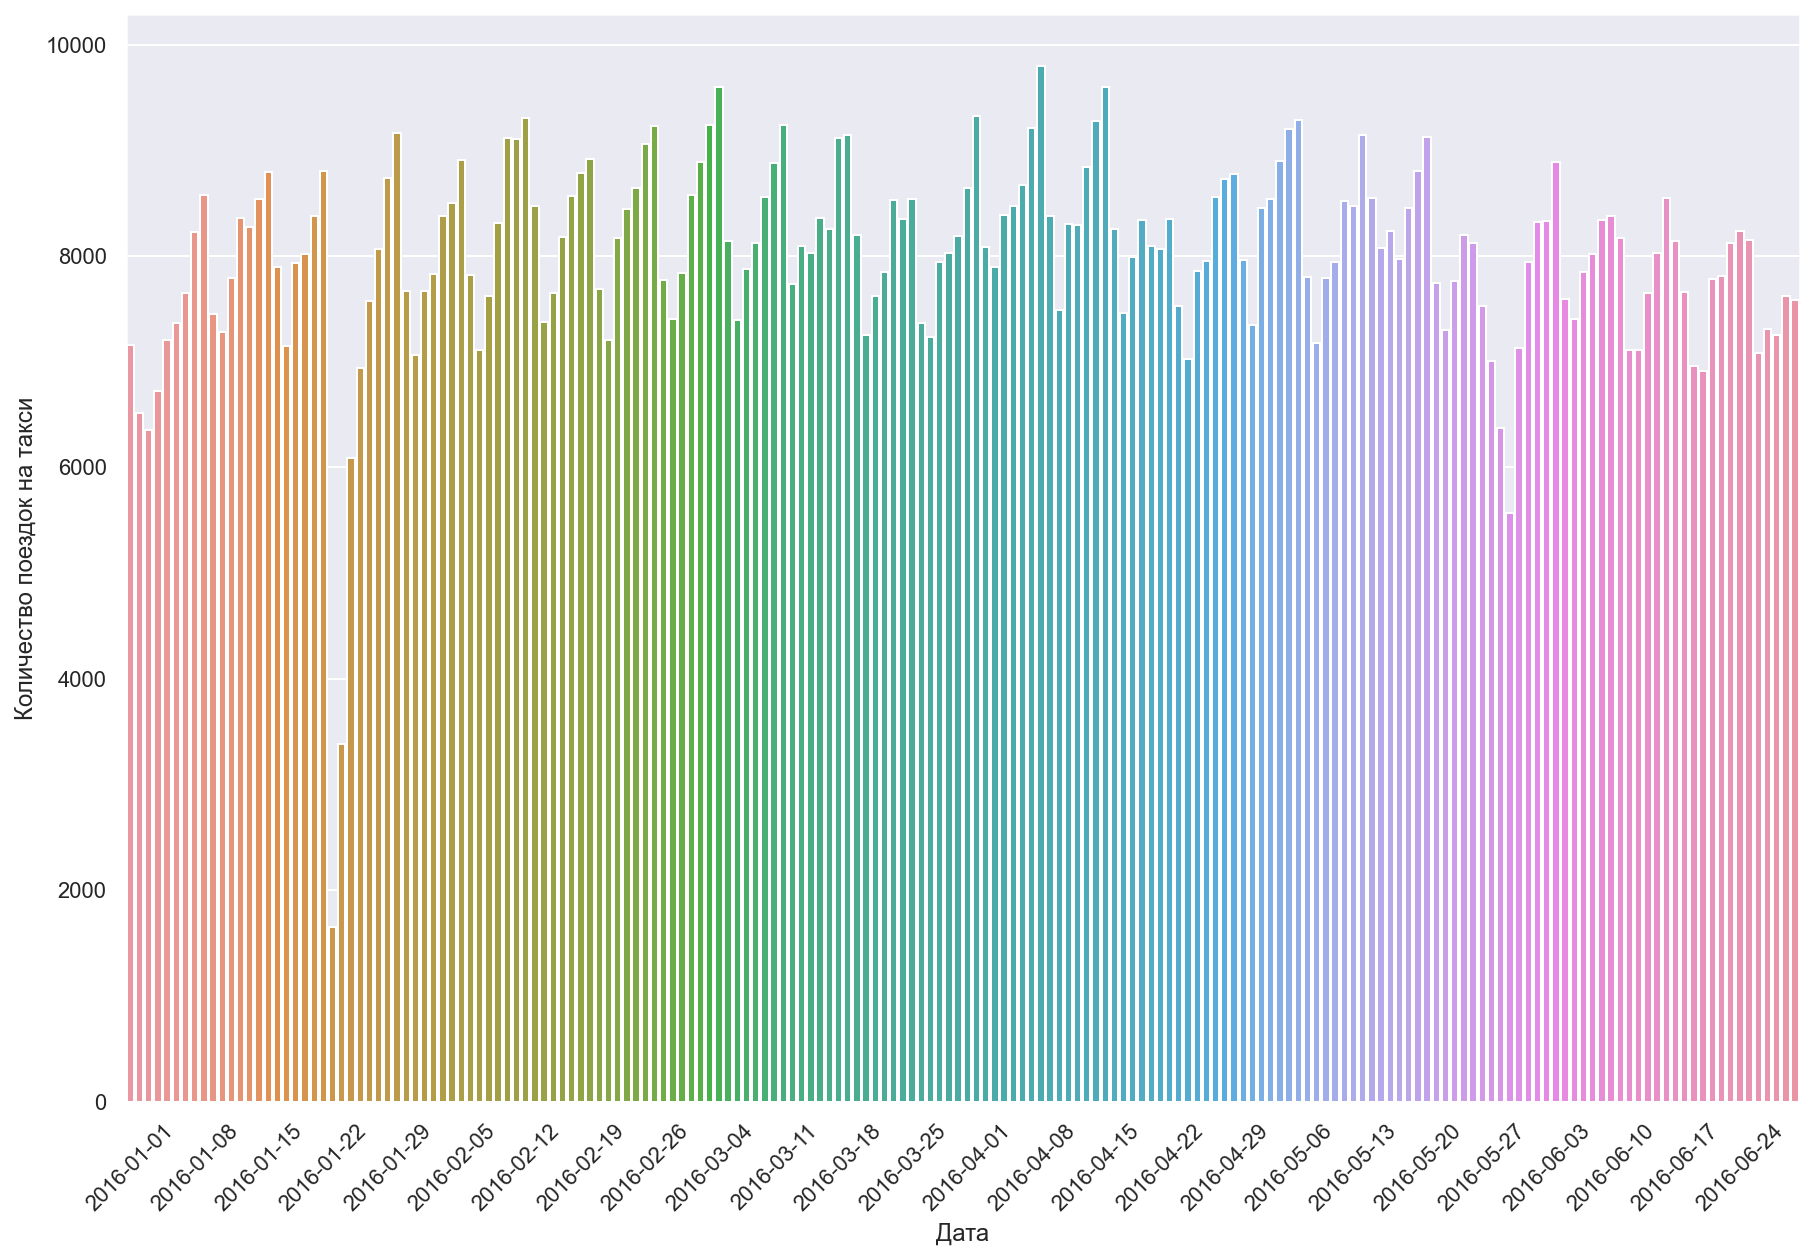

In [14]:
plt.figure(figsize = (20, 8))
fig = sns.countplot(datetime_date)
fig.figure.set_size_inches(15, 10)
fig.set(xlabel='Дата', ylabel='Количество поездок на такси')
plt.xticks(np.arange(0, pd.to_timedelta(datetime_date.max() - 
                                        datetime_date.min()).days + 1, 7), rotation=45)
plt.show()

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

In [15]:
df['date'] = pd.DatetimeIndex(df.pickup_datetime).date
df.groupby(by = 'date').id.count().nsmallest(10)

date
2016-01-23    1648
2016-01-24    3383
2016-05-30    5570
2016-01-25    6084
2016-01-03    6353
2016-05-29    6372
2016-01-02    6512
2016-01-04    6725
2016-06-20    6910
2016-01-26    6941
Name: id, dtype: int64

**2016-01-23:** *Власти запретили автомобильное движение в Нью-Йорке из-за снежной бури*

https://www.nbcnewyork.com/news/local/nyc-new-york-city-blizzard-biggest-ever-january-23-2016/831660/

**2016-05-30:** *Возможно, причинами могли стать следующие факторы:*

1) https://en.wikipedia.org/wiki/Memorial_Day

2) https://tass.ru/proisshestviya/3324970

In [16]:
df.drop(columns = 'date')
display()

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

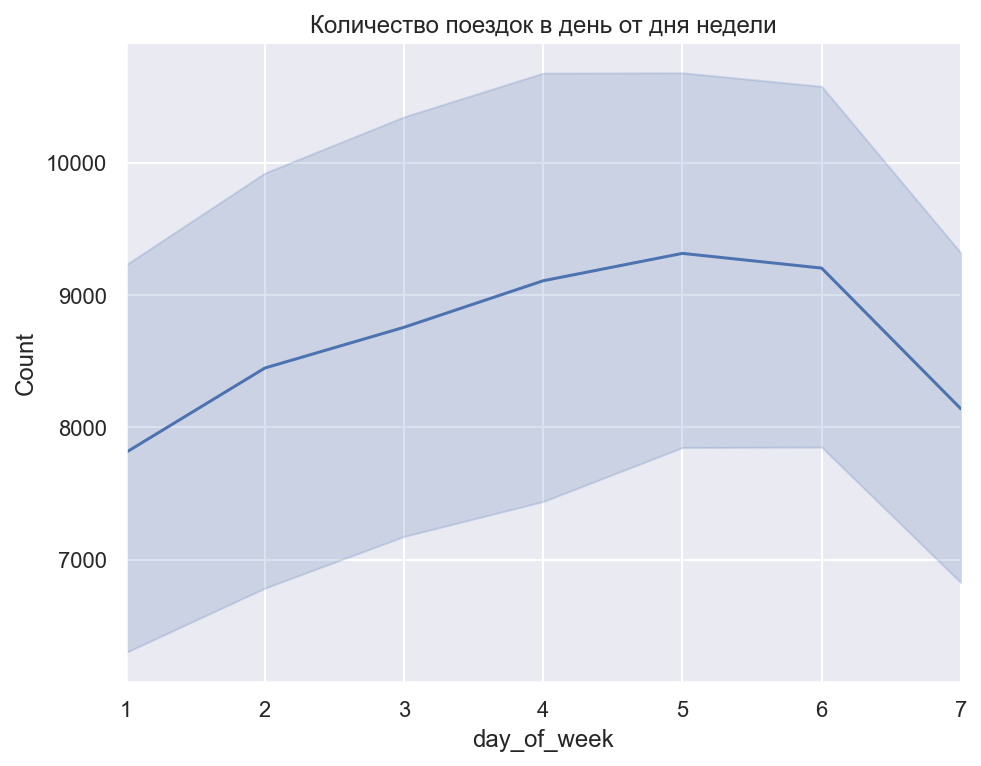

In [17]:
df['day_of_week'] = pd.DatetimeIndex(df.pickup_datetime).dayofweek + 1
df['hour'] = pd.DatetimeIndex(df.pickup_datetime).hour + 1
df1 = pd.DataFrame(df.rename(columns = {'id' : 'Count'}).groupby(by = ['day_of_week', 'hour']).Count.count())
sns.relplot(data = df1, x="day_of_week", y='Count', kind="line")
plt.gcf().set_size_inches(7, 5)
#plt.xticks(ticks=np.arange(1,8,1), labels=days_of_week, rotation=30)
plt.title("Количество поездок в день от дня недели")
plt.xlim(1,7)
plt.show()

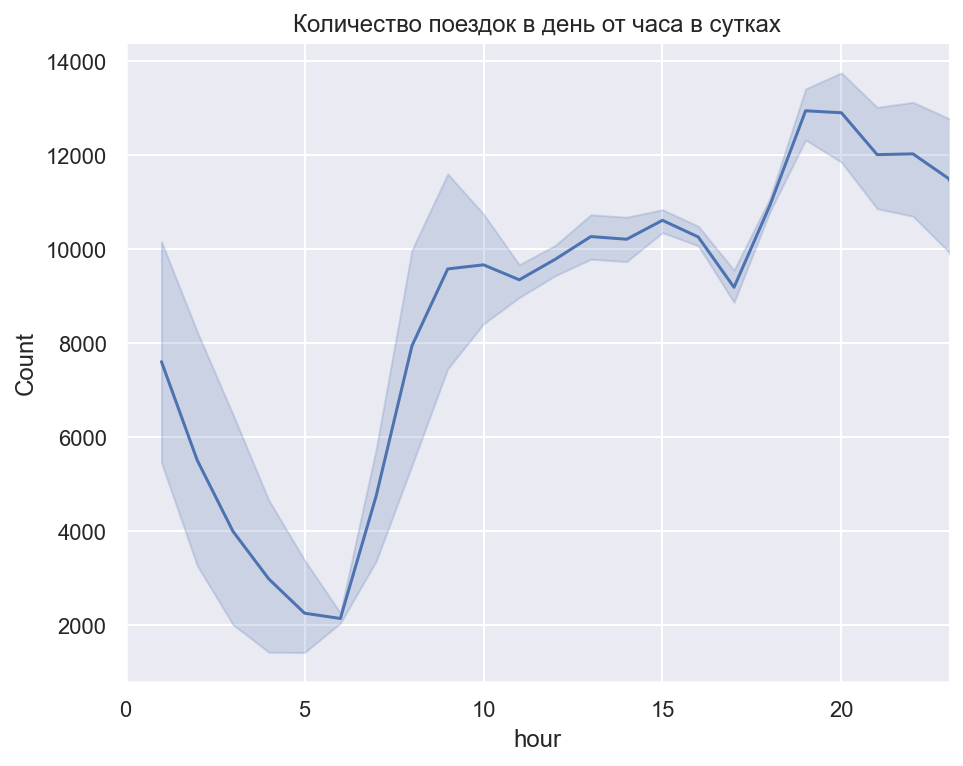

In [18]:
sns.relplot(x="hour", y="Count", data=df1, kind="line") #кажется, линиями нагляднее
plt.gcf().set_size_inches(7, 5)
plt.title("Количество поездок в день от часа в сутках")
plt.xlim(0,23)
plt.show()

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

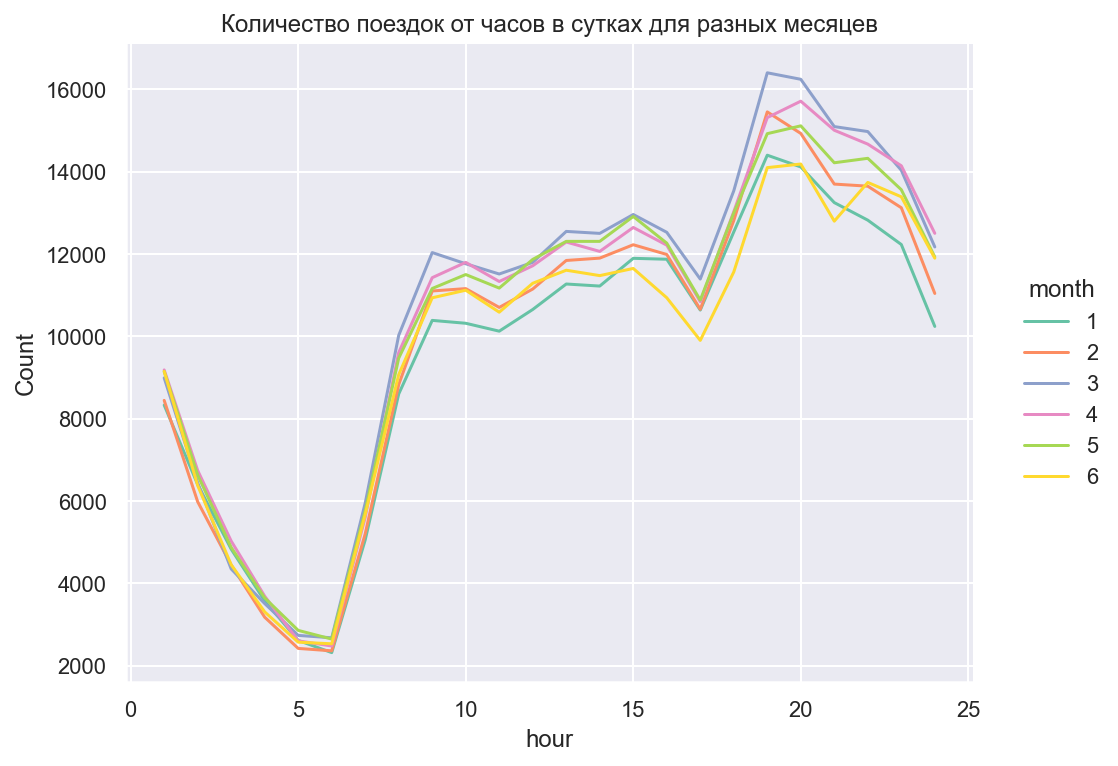

In [19]:
df['month'] = pd.DatetimeIndex(df.pickup_datetime).month
df1 = pd.DataFrame(df.rename(columns = {'id' : 'Count'}).groupby(by = ['month', 'hour']).Count.count())
sns.relplot(x="hour", y='Count', hue="month",
            data=df1, palette="Set2", kind="line")
plt.gcf().set_size_inches(8, 5)
plt.title("Количество поездок от часов в сутках для разных месяцев")
plt.show()

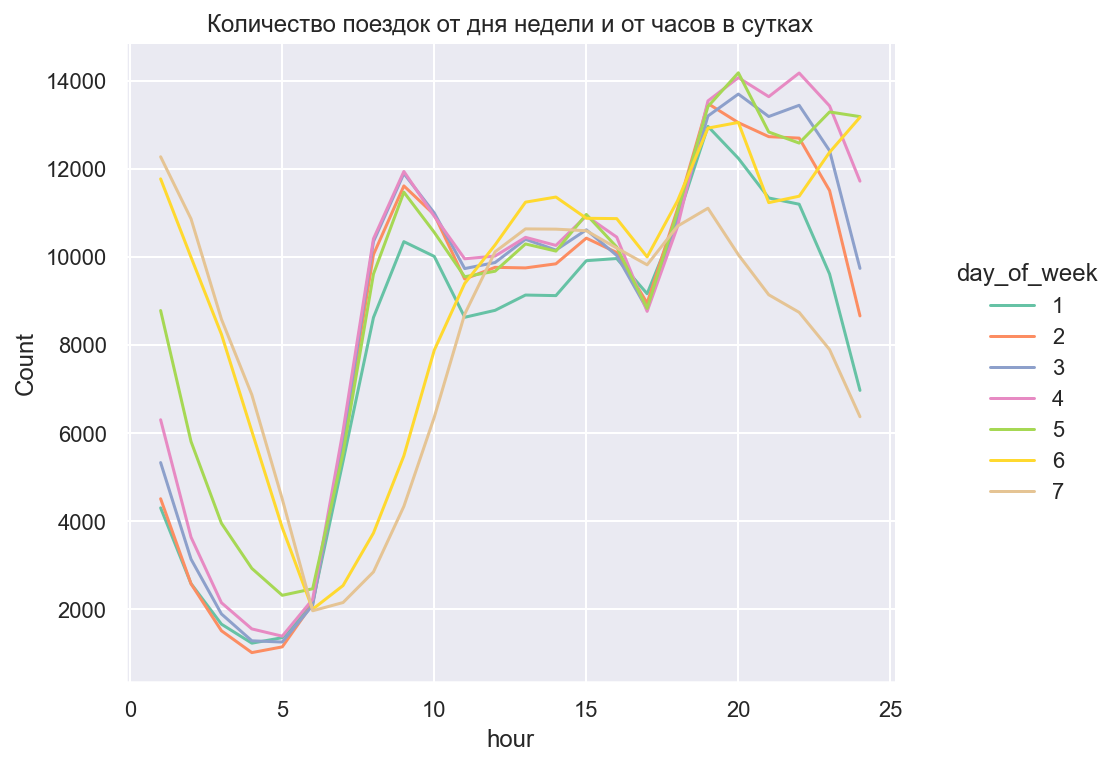

In [20]:
df1 = pd.DataFrame(df.rename(columns = {'id' : 'Count'}).groupby(by = ['day_of_week', 'hour']).Count.count())
sns.relplot(x="hour", y='Count', hue="day_of_week", 
            data=df1, palette="Set2", kind="line")
plt.gcf().set_size_inches(8, 5)
plt.title("Количество поездок от дня недели и от часов в сутках")
plt.show()

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

*Везде наблюдается большая просадка по количеству поездок в 4-5 утра (что логично), самые же большие показатели около 18-19 часов.*

*По дням недели самое большое количество поездок приходится на период будних дней, в субботу в целом сохраняется паттерн пятницы (поездок становится немного меньше), а в воскресенье наблюдается большая просадка по вызовам*

*Самые большие значения вызовов наблюдаются весной (особенно в марте и апреле), к лету медленно спадают. Зимой, особенно в январе, люди меньше склонны ездить на такси (хотя возможно на наш результат повлиял тот самый шторм, который довольно сильно уменьшил количество поездок на несколько январских дней)*

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3. По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
np.random.seed(51261)
X = df.drop(columns = 'log_trip_duration')
y = df.log_trip_duration
data, X_test, y_train, y_test = train_test_split(df, y, test_size = 3/10)

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

*В целом зависимость таргета от дня недели остается похожей на зависимость числа поездок от дня недели (разве что, в субботу можно увидеть спад таргета относительно всех будних дней, когда как число поездок остается чуть большем, чем в понедельник). Можно предположить, что довольно большая часть людей, имеющих автомобили разъезжаются из Нью-Йорка в пригороды, тем самым освобождая дорогу для таксистов (поэтому, время поездки должно быть меньше)*

*Зависимость от часов в сутках в целом похожая, хоть и минимум таргета наблюдается в 6 утра, в отличии от количества поездок, которое минимально в 4-5 утра. Кроме того, по количеству поездок дневное время похоже на плато с максимумом в 19 часов, что касается таргета, то максимум смещен на 14-15 часов. Это объясняется тем, что в эти часы дорога более разгруженна/загруженна (помимо такси на дороге есть масса другого транспорта, поэтому корелляция между количеством вызовов и длиной пути может быть не прямой*

*Зависимость таргета от дня в году, к неожиданности, оказалась возрастающей линейной. Это можно попытаться объяснить тем, что число машин и людей в городе к лету растет(зимой больше людей уезжают в более теплые штаты). На последнем графике также видно несколько выбросов как раз в аномальные периоды. Первый связан с очень большими снегопадами, из-за которых было трудно добраться до места. Второй выброс не так велик, но также мог быть связан с большими пробками в те дни.*

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [23]:
df['day_of_year'] = pd.DatetimeIndex(df.pickup_datetime).dayofyear
df['is_anomal_1'] = pd.Series(np.full(df.shape[0], 0))
df.update(pd.Series(np.full(df[(df.day_of_year <=25) & ((df.day_of_year >=23))].shape[0], 1),
                                                           index = df[(df.day_of_year <=25)
                                                                      & ((df.day_of_year >=23))].index).rename('is_anomal_1'))

df['is_anomal_2'] = pd.Series(np.full(df.shape[0], 0))
df.update(pd.Series(np.full(df[df.day_of_year == 151].shape[0], 1),
                                                           index = df[df.day_of_year == 151].index).rename('is_anomal_2'))

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков стоит рассматривать как категориальные, а какие - как численные? Почему?

*1) День недели можно рассмотреть как категориальный признак, так как зависимость между таргетом и признаком нелинейная, а матрицу OHE увеличит несильно*

*2) Месяц тоже можно рассмотреть как категориальный признак по тем же причинам*

*3) Час можно рассматривать как численный признак, но с предварительной обработкой (например, можно попробовать добавить полиномиальных признаков, образованных из данного столбца)*

*P.S. Попробовал, даже 8-10 степень недостаточно хорошо аппроксимирует спад в районе 6 часов утра, решил использовать OHE*

*4) Уже добавили как бинарный признак*

*5) Номер дня в году определенно стоит добавлять как численный признак, так как судя по графику, между таргетом и данным признаком прослеживается линейная зависимость*

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [1]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

StandardScaler()
Ridge()
df.fillna(0)
df_date = df[['day_of_year', 'day_of_week', 'month', 'is_anomal_1', 'is_anomal_2', 'hour']]
numeric_features = []
categorical = df_date[['day_of_year','day_of_week', 'month', 'is_anomal_1', 'is_anomal_2', 'hour']].columns

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(alpha = 100))
])
y = df.log_trip_duration
X_train, X_test, y_train, y_test = train_test_split(df_date, y, test_size = 3/10, random_state = 51261)

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

NameError: name 'df' is not defined

## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [25]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    
    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [26]:
show_circles_on_map(df.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [27]:
show_circles_on_map(df.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

**Вопрос**: Какие две точки выделяются на карте?

*Выделяются два аэропорта*

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [28]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h
df['haversine'] = haversine_array(df.pickup_latitude, df.pickup_longitude, df.dropoff_latitude, df.dropoff_longitude)

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку:

In [29]:
df['log_haversine'] = np.log1p(df.haversine)

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

<AxesSubplot:>

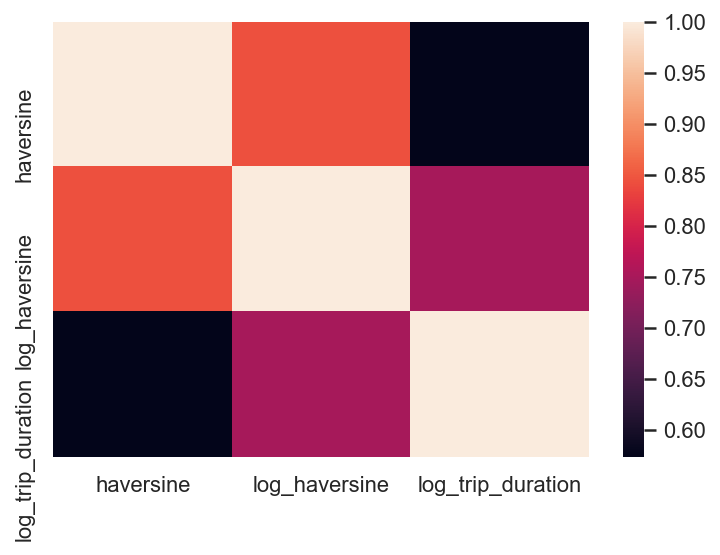

In [30]:
sns.heatmap(df[['haversine', 'log_haversine', 'log_trip_duration']].corr())

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

In [31]:
X_train['velocity'] = df.haversine[X_train.index] / df.trip_duration[X_train.index] * 3600 #kmph

<ipython-input-31-5b1aaf8a94b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['velocity'] = df.haversine[X_train.index] / df.trip_duration[X_train.index] * 3600 #kmph


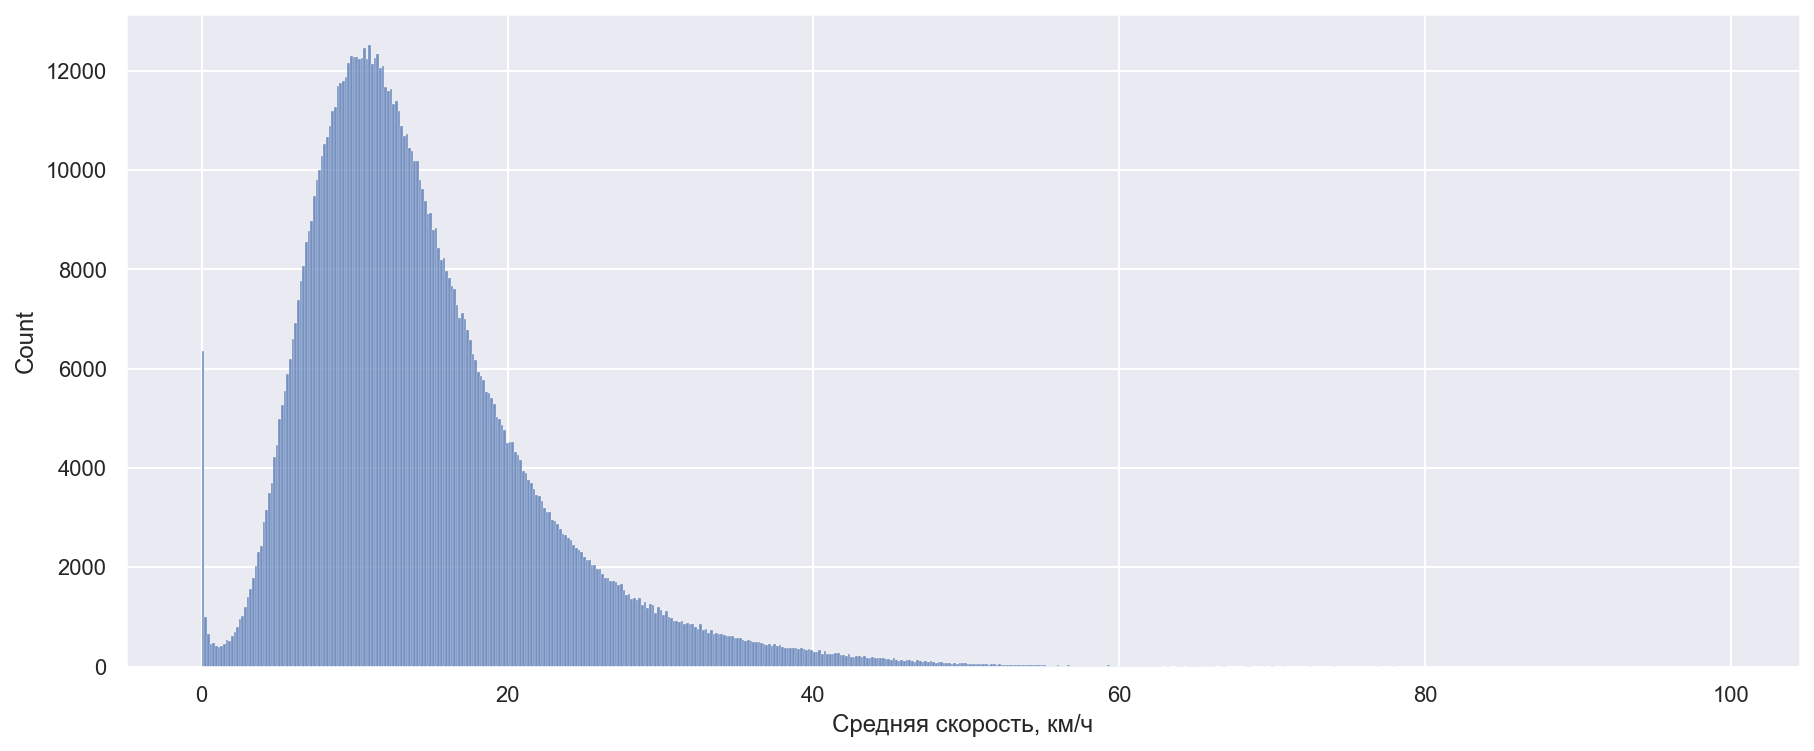

In [32]:
plt.figure(figsize = (15,6))
sns.histplot(X_train.velocity[X_train.velocity <=100]) 
#plt.xticks(np.arange(0, 4000, 150))
#plt.xlim(0, 4000)
plt.xlabel('Средняя скорость, км/ч')
plt.title('')
plt.show()

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

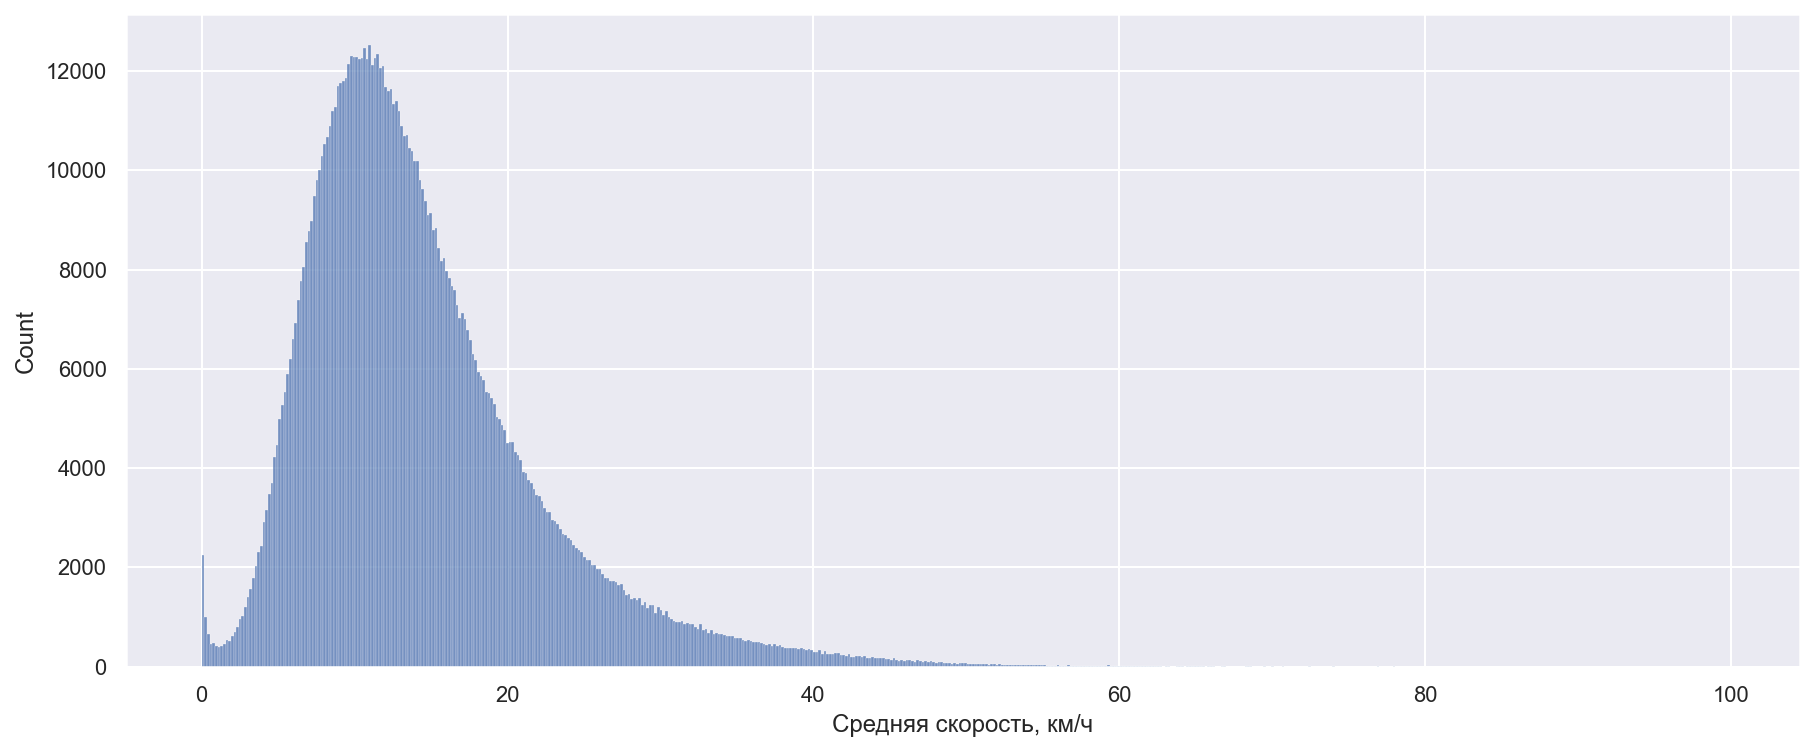

In [33]:
plt.figure(figsize = (15,6))
sns.histplot(X_train.velocity[(X_train.velocity <=100)&(X_train.velocity != 0)]) 
plt.xlabel('Средняя скорость, км/ч')
plt.title('')
plt.show()
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ сразу норм построил но держите еще разочек без vel = 0

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

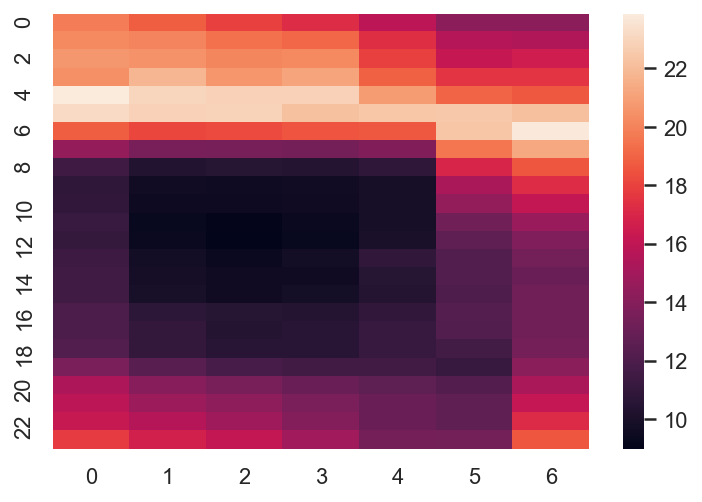

In [34]:
df1 = pd.DataFrame(X_train.groupby(by = ['day_of_week', 'hour']).velocity.median()).unstack()
sns.heatmap(np.array(df1.T))
plt.show()

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

*Потому что скорость содержит информацию о целевой переменной*

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

*Минимальна около полудня в будние дни, максимальна ранним утром(выше всего в 4 утра в понедельник и в 6 утра в воскресенье)*

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [35]:
a = (np.array(df1) < 15)
df['is_traffic_jam'] = np.zeros(df.shape[0])
for day_of_week in range(7):
    vec = df[np.isin(df.hour, (a * np.arange(1, 25))[day_of_week, :])]
    df.is_traffic_jam = pd.Series(np.ones(vec.shape[0]), index = vec.index)
df.fillna(0, inplace = True)

In [36]:
X_train.drop(columns = 'velocity', inplace = True)

C:\Users\Ilya\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [37]:
df.is_traffic_jam.value_counts()

1.0    732877
0.0    725767
Name: is_traffic_jam, dtype: int64

**Задание 8 (0.25 балла)**. Как уже было замечено выше, на карте выделяются две точки вдали от Манхэттена. Для каждой из них добавьте в выборку два признака: началась ли поездка в ней и закончилась ли она в ней.

*На самом деле при детальном рассмотрении оказалось, что таких точек три, поэтому для третьей я также создам признак*

In [38]:
#show_circles_on_map(df[(df.dropoff_latitude > 40.65)&(df.dropoff_longitude > -74.20)
#                       &(df.dropoff_latitude < 40.71)&(df.dropoff_longitude < -74.14)].sample(1000),
#                                            "dropoff_latitude", "dropoff_longitude", "blue")

In [39]:
#show_circles_on_map(df[(df.dropoff_latitude > 40.77)&(df.dropoff_longitude > -73.89)
#                       &(df.dropoff_latitude < 40.78)&(df.dropoff_longitude < -73.86)].sample(10000),
#                                            "dropoff_latitude", "dropoff_longitude", "blue")

In [40]:
for airport in ['jk_', 'lg_','nlia_']:
    for status in ['dropoff', 'pickup']:
        if airport == 'jk_':
            lat1 = 40.63
            lat2 = 40.67
            lon1 = -73.81
            lon2 = -73.76
        elif airport == 'lg_':
            lat1 = 40.77
            lat2 = 40.78
            lon1 = -73.89
            lon2 = -73.86
        else:
            lat1 = 40.65
            lat2 = 40.71
            lon1 = -74.20
            lon2 = -74.14
        vec = df[(df[status + '_latitude'] > lat1)&(df[status + '_longitude'] > lon1)&
        (df[status + '_latitude'] < lat2)&(df[status + '_longitude'] < lon2)]
        df['is_' + airport + status] = pd.Series(np.ones(vec.shape[0]), vec.index)
df.fillna(0, inplace = True)

Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

In [41]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'log_trip_duration', 'date', 'day_of_week', 'hour', 'month',
       'day_of_year', 'is_anomal_1', 'is_anomal_2', 'haversine',
       'log_haversine', 'is_traffic_jam', 'is_jk_dropoff', 'is_jk_pickup',
       'is_lg_dropoff', 'is_lg_pickup', 'is_nlia_dropoff', 'is_nlia_pickup'],
      dtype='object')

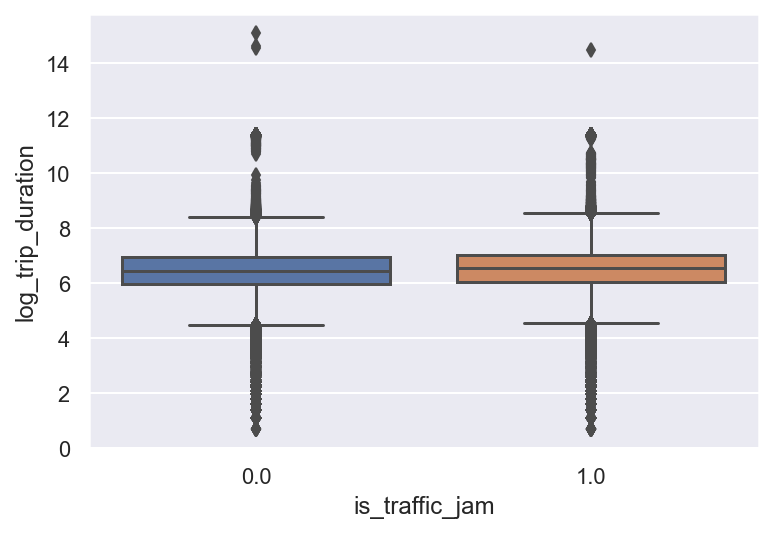

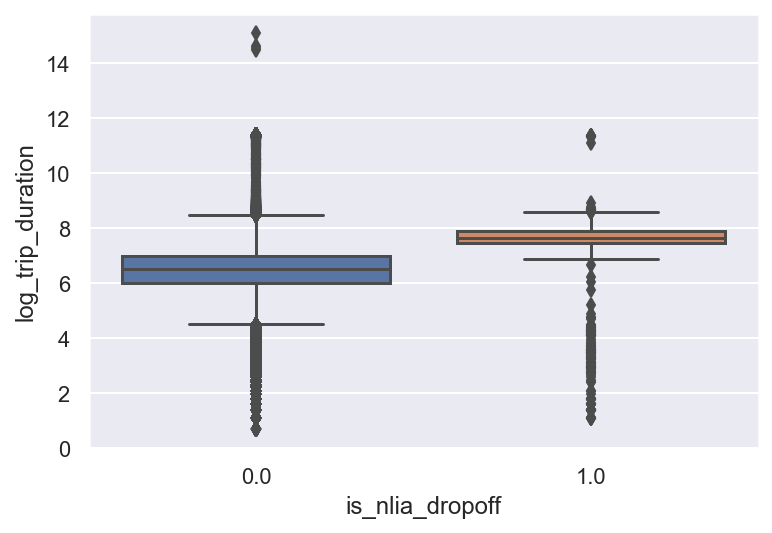

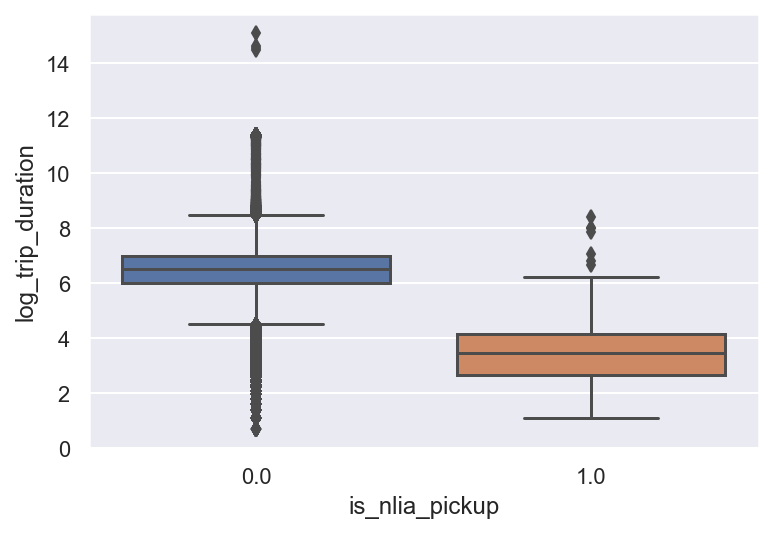

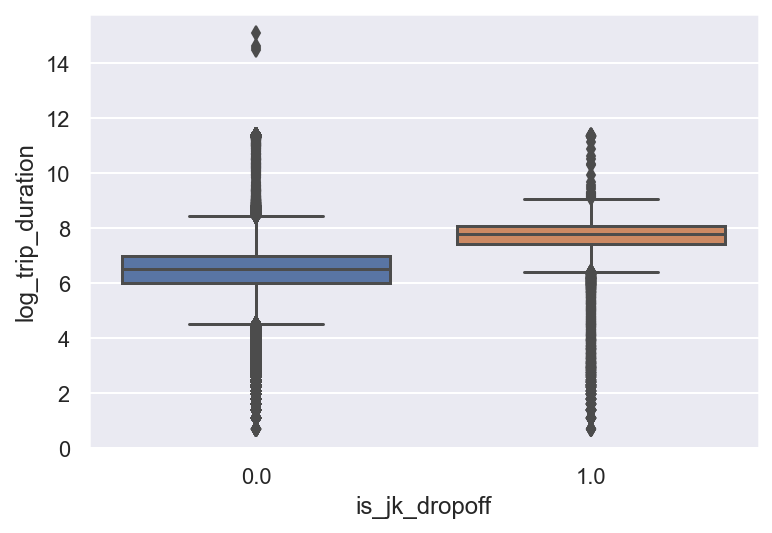

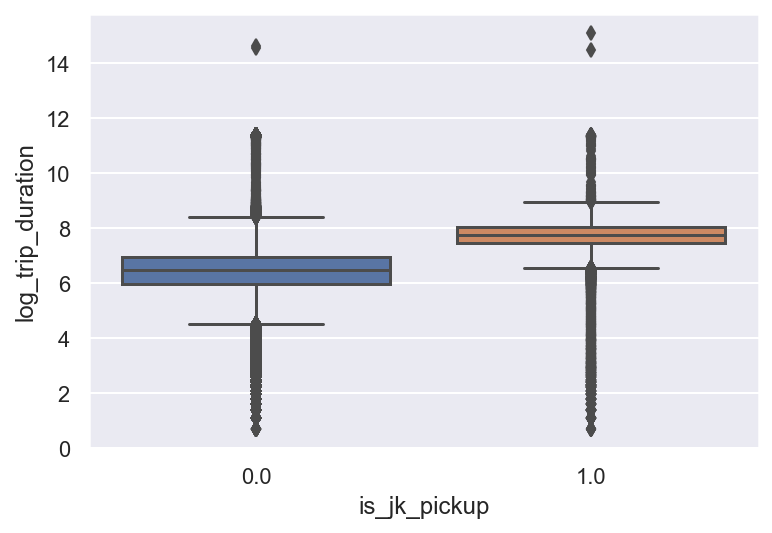

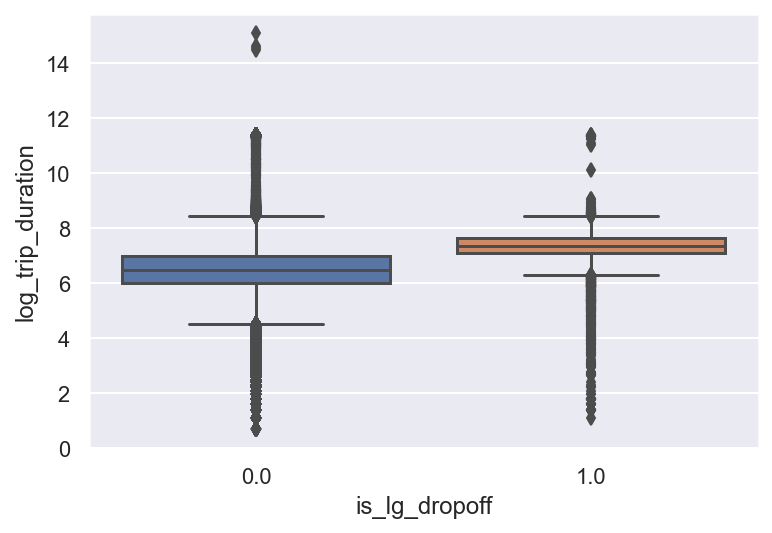

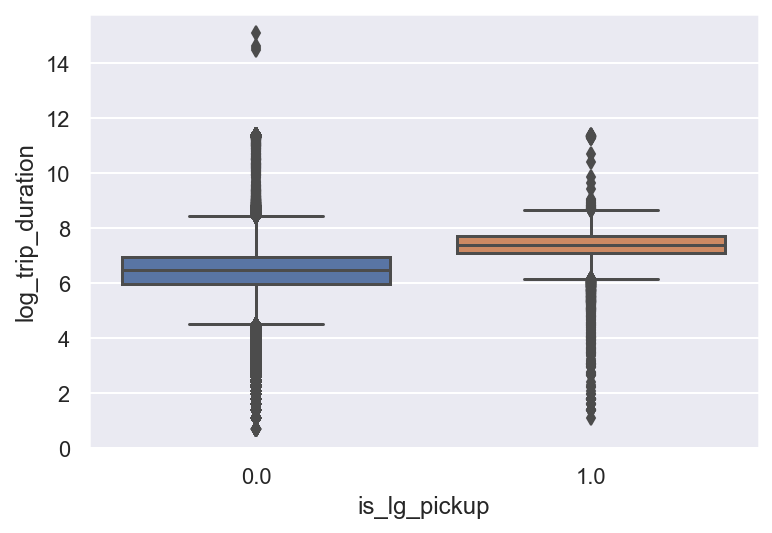

In [42]:
for x in ['is_traffic_jam', 'is_nlia_dropoff',
       'is_nlia_pickup', 'is_jk_dropoff', 'is_jk_pickup', 'is_lg_dropoff', 'is_lg_pickup']:
    sns.boxplot(data = df, x = x, y = 'log_trip_duration')
    plt.show()

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

*Думаю, что да, так как отличие видно невооруженным глазом (а это ведь логарифм целевой переменной! значит типичное значение самой целевой переменной может отличаться на порядок)*

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [43]:
from sklearn.base import BaseEstimator, TransformerMixin

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, quantile=0.95, n_l=20, n_w = 20):
        """
        Функция для разбиения карты на ячейки
        :param quantile: float от 0 до 1, квантиль того, сколько обучающей выборки хотим обрезать для определения области обрамляющего прямоугольника
        :param n_l: int > 0, число ячеек по долготе
        :param n_l: int > 0, число ячеек по широте
        """
        self.quantile = quantile
        self.n_l = n_l
        self.n_w = n_w
        
    def fit(self, X_train, y_train):
        self.X_train = X_train.copy()
        self.longitude = self.X_train[['pickup_longitude', 'dropoff_longitude']]
        self.latitude = self.X_train[['pickup_latitude', 'dropoff_latitude']]
        self.longitude_1 = self.longitude.quantile(self.quantile).mean() #считаем статистику по обучающей 
                                                                         #выборке
        self.longitude_2 = self.longitude.quantile(1 - self.quantile).mean()
        self.latitude_1 = self.latitude.quantile(self.quantile).mean()
        self.latitude_2 = self.latitude.quantile(1 - self.quantile).mean()
        return self

    def transform(self, X):
        self.X = X.copy()
        l = np.linspace(self.latitude_2, self.latitude_1, self.n_l) #задаем границы ячеек для долготы
        w = np.linspace(self.longitude_2, self.longitude_1, self.n_w) #задаем границы ячеек для широты
        for status in ['pickup', 'dropoff']:  
            for coordinate in ['latitude', 'longitude']:
                if coordinate == 'latitude':
                    size = l
                    n = self.n_l
                else:
                    size = w
                    n = self.n_w
                square_coordinate = np.searchsorted(size, self.X[status + '_' + coordinate]) #определяем, 
                                                                            #находится ли точка внутри ячейки
                square_coordinate = np.where((square_coordinate == 0)|
                                             (square_coordinate == n), -1, square_coordinate) #присваиваем
                                                                          #ячейкам вне области значение -1
                self.X['square_' + status + '_' + coordinate] = square_coordinate
            K = self.X[(self.X['square_' + status + '_longitude'] != -1)&(self.X['square_' + status + '_latitude'] != -1)]
                                                      #выбираем все ячейки, которые попали в прямоугольник
            self.X['square_' + status] = (K['square_' + status + '_latitude']
                                           - 1) * self.n_w + K['square_' + status + '_longitude']
                                            #нумеруем все ячейки от 1 до n_w * n_l
            self.X.drop(columns = ['square_' + status + '_longitude', 'square_' + status + '_latitude'], 
                       inplace = True) #удаляем лишние колонки
        self.X.fillna(-1, inplace = True) #присваиваем всем непопавшим в обрамляющий прямоугольник ячейкам 
                                                                                                #значение-1
        return self.X

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [44]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 3/10, random_state = 51261)

numeric_features = ['log_haversine']

categorical = ['day_of_week', 'hour', 'month',
       'day_of_year', 'is_anomal_1', 'is_anomal_2', 'is_traffic_jam', 'is_jk_dropoff',
       'is_jk_pickup', 'is_lg_dropoff', 'is_lg_pickup', 'is_nlia_dropoff',
       'is_nlia_pickup', 'square_pickup', 'square_dropoff']

MGT = MapGridTransformer(quantile = 0.997, n_l = 110, n_w = 110)

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[('map_grid_transformer', MGT),
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(alpha = 150))
    ])

In [45]:
model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.4636


In [46]:
0.4636

0.4636

## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [47]:
df.vendor_id.value_counts()

2    780302
1    678342
Name: vendor_id, dtype: int64

In [48]:
df.passenger_count.value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

In [49]:
df.store_and_fwd_flag.value_counts()

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

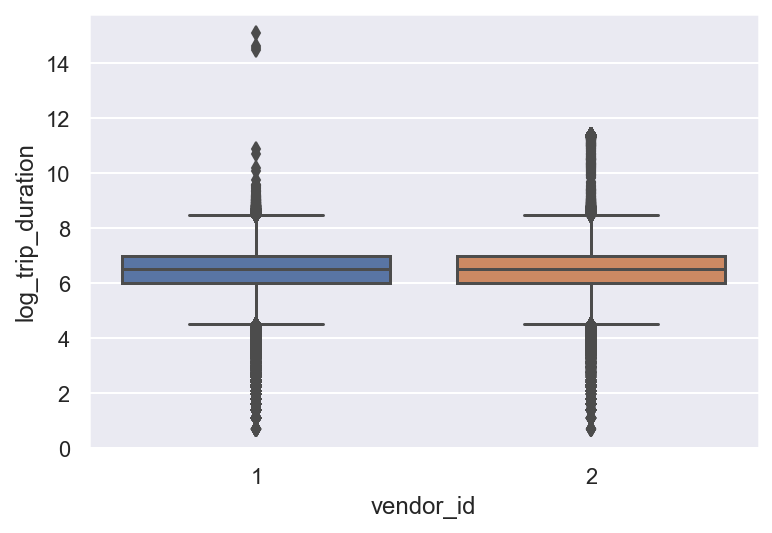

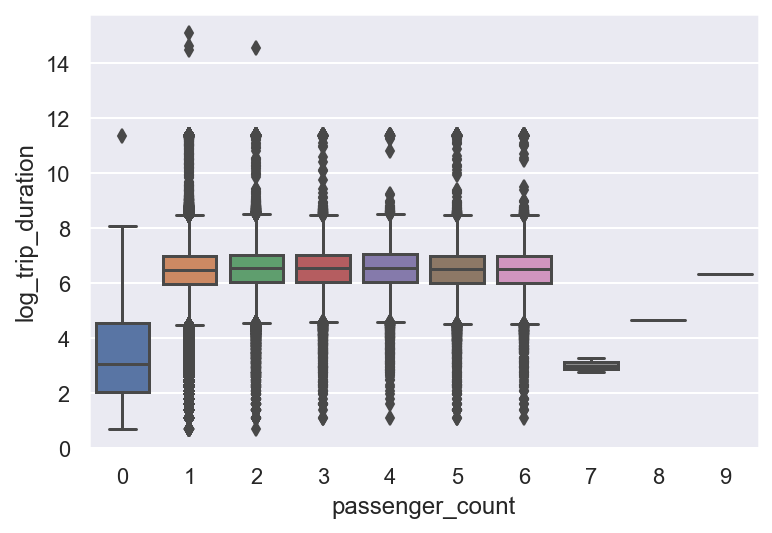

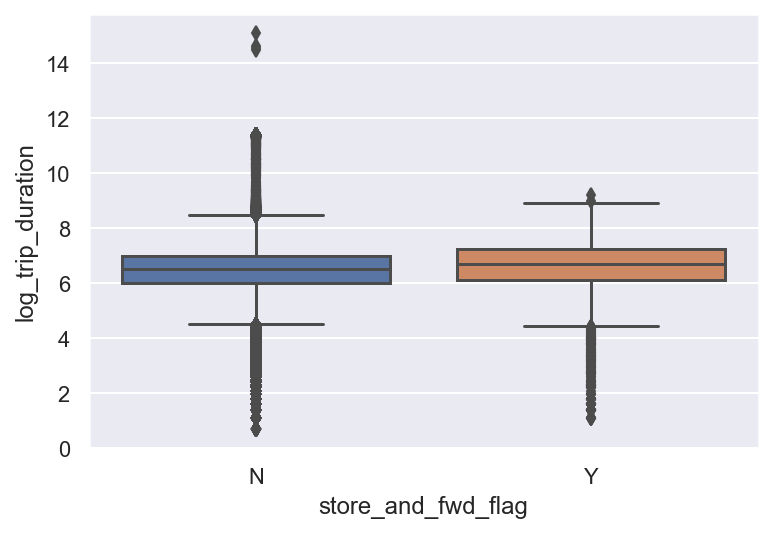

In [50]:
for x in ['vendor_id', 'passenger_count', 'store_and_fwd_flag']:
    sns.boxplot(data = df, x = x, y = 'log_trip_duration')
    plt.show()

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [51]:
df.loc[df.vendor_id == 2, 'vendor_id'] = 0
df.loc[df.store_and_fwd_flag == 'N', 'store_and_fwd_flag'] = 0
df.loc[df.store_and_fwd_flag == 'Y', 'store_and_fwd_flag'] = 1
df.vendor_id

0          0
1          1
2          0
3          0
4          0
          ..
1458639    0
1458640    1
1458641    0
1458642    1
1458643    1
Name: vendor_id, Length: 1458644, dtype: int64

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

*Не будут особо сильными, но почему-бы и нет*

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [52]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 3/10, random_state = 51261)

numeric_features = ['log_haversine']

categorical = ['day_of_week', 'hour', 'month',
       'day_of_year', 'is_anomal_1', 'is_anomal_2', 'is_traffic_jam', 'is_jk_dropoff',
       'is_jk_pickup', 'is_lg_dropoff', 'is_lg_pickup', 'is_nlia_dropoff',
       'is_nlia_pickup', 'square_pickup', 'square_dropoff', 'vendor_id', 'passenger_count', 'store_and_fwd_flag']

MGT = MapGridTransformer(quantile = 0.997, n_l = 110, n_w = 110)

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[('map_grid_transformer', MGT),
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(alpha = 150))
    ])

In [53]:
model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.4634


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты: с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите обучающую выборку от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

In [54]:
y_pred_train = model.predict(X_train)
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_pred_train, squared=False))

Train RMSE = 0.4627


In [55]:
X_train.shape[0]

1021050

<ipython-input-56-b5b65475755c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['rmse'] = abs(y_pred_train - y_train)


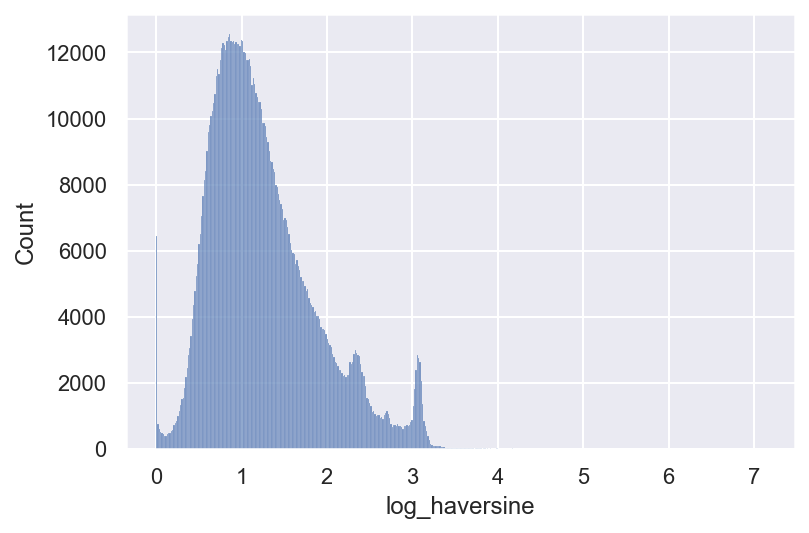

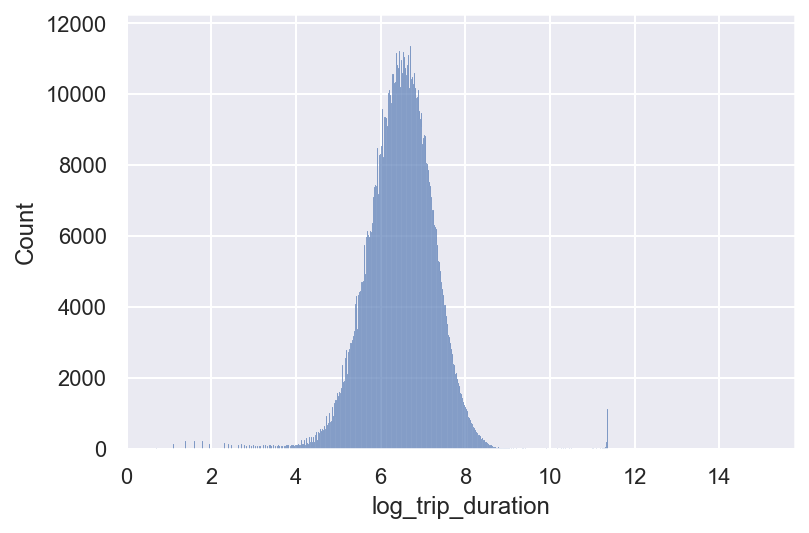

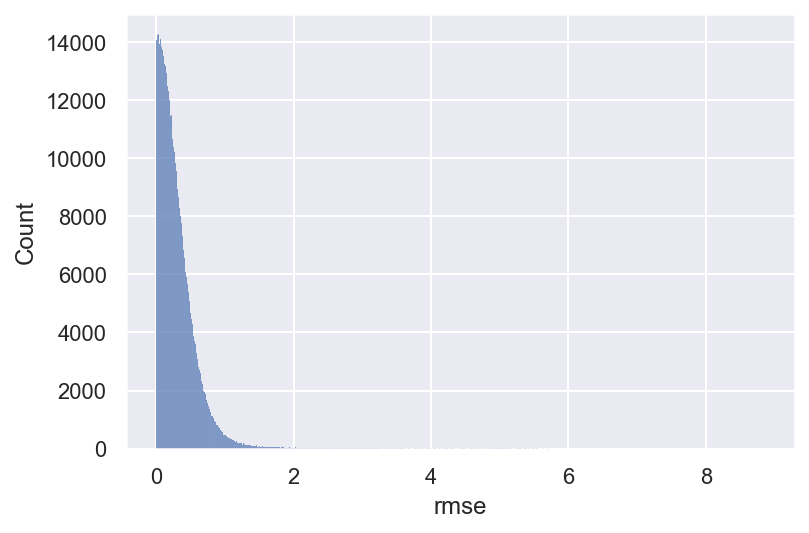

In [56]:
X_train['rmse'] = abs(y_pred_train - y_train)
X_train_rmse = X_train['rmse']
for value in ['log_haversine', 'log_trip_duration', 'rmse']:
    sns.histplot(X_train[value])
    plt.show()

In [57]:
X_train = X_train[(X_train.rmse < 2)&(X_train.log_haversine < 3.5)&
                  (X_train.log_haversine > 0 )&
                  (X_train.log_trip_duration > 4)&(X_train.log_trip_duration < 9)]

In [58]:
X_train.shape[0]

1009895

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Попробуйте объединить редкие категории в одну. Естественно, делать это нужно только для действительно редких категорий.

In [59]:
A = X_train[['day_of_week', 'hour', 'month',
       'day_of_year', 'is_anomal_1', 'is_anomal_2', 'is_traffic_jam', 'is_jk_dropoff',
       'is_jk_pickup', 'is_lg_dropoff', 'is_lg_pickup', 'is_nlia_dropoff',
       'is_nlia_pickup', 'vendor_id', 'passenger_count', 'store_and_fwd_flag']]

In [60]:
for column in A.columns:
    x = A[column].value_counts()[A[column].value_counts() < 3000]
    if x.shape[0] != 0:
        print(x)

24    2343
23    1117
Name: day_of_year, dtype: int64
1.0    1812
Name: is_nlia_dropoff, dtype: int64
1.0    21
Name: is_nlia_pickup, dtype: int64
0    13
Name: passenger_count, dtype: int64


*Давайте объеденим все признаки с аэропортами в два признака (один с высадкой, другой с посадкой)*

In [61]:
for X in [X_train, X_test, df]:
    X['is_airport_dropoff'] = X['is_nlia_dropoff'] + X['is_jk_dropoff'] + X['is_lg_dropoff']
    X['is_airport_pickup'] = X['is_nlia_pickup'] + X['is_jk_pickup'] + X['is_lg_pickup']
    X.drop(columns = ['is_nlia_pickup', 'is_jk_pickup', 'is_lg_pickup', 
                      'is_nlia_dropoff', 'is_jk_dropoff', 'is_lg_dropoff'], inplace = True)

<ipython-input-61-2961eb6a406a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['is_airport_dropoff'] = X['is_nlia_dropoff'] + X['is_jk_dropoff'] + X['is_lg_dropoff']
<ipython-input-61-2961eb6a406a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['is_airport_pickup'] = X['is_nlia_pickup'] + X['is_jk_pickup'] + X['is_lg_pickup']
C:\Users\Ilya\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [62]:
y_train = y_train[X_train.index]

X_train = X_train[['pickup_longitude', 'dropoff_longitude', 'dropoff_latitude',
                   'pickup_latitude', 'day_of_week', 'hour', 'month','day_of_year', 'is_anomal_1', 'is_anomal_2', 
                   'is_traffic_jam', 'is_airport_dropoff', 'is_airport_pickup', 'vendor_id', 
                   'passenger_count', 'store_and_fwd_flag', 'log_haversine']]
X_test = X_test[X_train.columns]

numeric_features = ['log_haversine']

categorical = ['day_of_week', 'hour', 'month','day_of_year', 'is_anomal_1', 'is_anomal_2', 
               'is_traffic_jam', 'is_airport_dropoff', 'is_airport_pickup', 'square_pickup', 
               'square_dropoff', 'vendor_id', 'passenger_count', 'store_and_fwd_flag']

MGT = MapGridTransformer(quantile = 0.997, n_l = 110, n_w = 110)

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[('map_grid_transformer', MGT),
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(alpha = 150))
    ])

In [63]:
model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.4645


In [64]:
model = pipeline.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_pred_train, squared=False))

Train RMSE = 0.3813


**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [65]:
OHE = OneHotEncoder()
X_train_1 = MGT.fit(X_train, y_train).transform(X_train)[categorical]
X_train_1
print('До OHE:', X_train_1.shape[1])
print('После OHE:', OHE.fit(X_train_1).transform(X_train_1).shape[1])

До OHE: 14
После OHE: 11287


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [66]:
from sklearn.linear_model import Lasso

pipeline = Pipeline(steps=[('map_grid_transformer', MGT),
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
    ])

In [67]:
model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 0.7968


*На таком количестве ячеек Lasso сходится очень медленно, поставлю 10x10*

Разбейте обучающую выборку на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [68]:
from tqdm import tqdm

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 2/10, random_state = 51261)

X_train = X_train[['pickup_longitude', 'dropoff_longitude', 'dropoff_latitude',
                   'pickup_latitude', 'day_of_week', 'hour', 'month','day_of_year', 'is_anomal_1', 'is_anomal_2', 
                   'is_traffic_jam', 'is_airport_dropoff', 'is_airport_pickup', 'vendor_id', 
                   'passenger_count', 'store_and_fwd_flag', 'log_haversine']]
X_test = X_test[X_train.columns]

numeric_features = ['log_haversine']

categorical = ['day_of_week', 'hour', 'month','day_of_year', 'is_anomal_1', 'is_anomal_2', 
               'is_traffic_jam', 'is_airport_dropoff', 'is_airport_pickup', 'square_pickup', 
               'square_dropoff', 'vendor_id', 'passenger_count', 'store_and_fwd_flag']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

MGT = MapGridTransformer(quantile = 0.997, n_l = 10, n_w = 10)

In [70]:
alphas_lasso = np.logspace(-3, 4, 10)[::-1]
rmse_lasso = []
i = 0
for alpha in tqdm(alphas_lasso):
    pipeline = Pipeline(steps=[('map_grid_transformer', MGT),
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(alpha = alpha))
    ])
    model = pipeline.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    rmse_lasso = np.append(rmse_lasso, rmse)
    if i > 0:
        coef_l = np.vstack((coef_l, model.named_steps['regression'].coef_))
    else:
        coef_l = model.named_steps["regression"].coef_
        i+= 1
    print('alpha = ', alpha)
    print("Test RMSE = %.4f" % rmse)

 10%|████████▎                                                                          | 1/10 [00:10<01:37, 10.87s/it]

alpha =  10000.0
Test RMSE = 0.7284


 20%|████████████████▌                                                                  | 2/10 [00:22<01:29, 11.22s/it]

alpha =  1668.100537200059
Test RMSE = 0.7284


 30%|████████████████████████▉                                                          | 3/10 [00:33<01:17, 11.11s/it]

alpha =  278.2559402207126
Test RMSE = 0.7284


 40%|█████████████████████████████████▏                                                 | 4/10 [00:42<01:03, 10.53s/it]

alpha =  46.41588833612782
Test RMSE = 0.7284


 50%|█████████████████████████████████████████▌                                         | 5/10 [00:53<00:53, 10.62s/it]

alpha =  7.742636826811269
Test RMSE = 0.7284


 60%|█████████████████████████████████████████████████▊                                 | 6/10 [01:04<00:42, 10.59s/it]

alpha =  1.291549665014884
Test RMSE = 0.7284


 70%|██████████████████████████████████████████████████████████                         | 7/10 [01:15<00:31, 10.63s/it]

alpha =  0.21544346900318845
Test RMSE = 0.4989


 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [01:30<00:24, 12.16s/it]

alpha =  0.03593813663804628
Test RMSE = 0.4494


 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [01:58<00:16, 16.92s/it]

alpha =  0.005994842503189409
Test RMSE = 0.4260


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [03:06<00:00, 18.64s/it]

alpha =  0.001
Test RMSE = 0.3984


In [71]:
best_rmse = 1
alphas_ridge = np.logspace(-2, 3, 10)
MGT = MapGridTransformer(quantile = 0.997, n_l = 10, n_w = 10)
rmse_ridge = []
for alpha in tqdm(alphas_ridge):
    pipeline = Pipeline(steps=[('map_grid_transformer', MGT),
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(alpha = alpha))
    ])
    model = pipeline.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    rmse_ridge = np.append(rmse_ridge, rmse)
    if rmse < best_rmse:
        best_rmse = rmse
        best_alpha = alpha
    print('alpha = ', alpha)
    print("Test RMSE = %.4f" % rmse)

 10%|████████▎                                                                          | 1/10 [00:09<01:24,  9.41s/it]

alpha =  0.01
Test RMSE = 0.3909


 20%|████████████████▌                                                                  | 2/10 [00:18<01:13,  9.18s/it]

alpha =  0.03593813663804628
Test RMSE = 0.3909


 30%|████████████████████████▉                                                          | 3/10 [00:26<01:03,  9.03s/it]

alpha =  0.1291549665014884
Test RMSE = 0.3909


 40%|█████████████████████████████████▏                                                 | 4/10 [00:35<00:53,  8.89s/it]

alpha =  0.464158883361278
Test RMSE = 0.3909


 50%|█████████████████████████████████████████▌                                         | 5/10 [00:44<00:44,  9.00s/it]

alpha =  1.6681005372000592
Test RMSE = 0.3909


 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:55<00:38,  9.59s/it]

alpha =  5.994842503189409
Test RMSE = 0.3909


 70%|██████████████████████████████████████████████████████████                         | 7/10 [01:05<00:28,  9.64s/it]

alpha =  21.544346900318846
Test RMSE = 0.3909


100%|████████████████████████████████████████████████████████████████████████████| 10/10 [49:07:57<00:00, 17687.76s/it]

alpha =  1000.0
Test RMSE = 0.3916


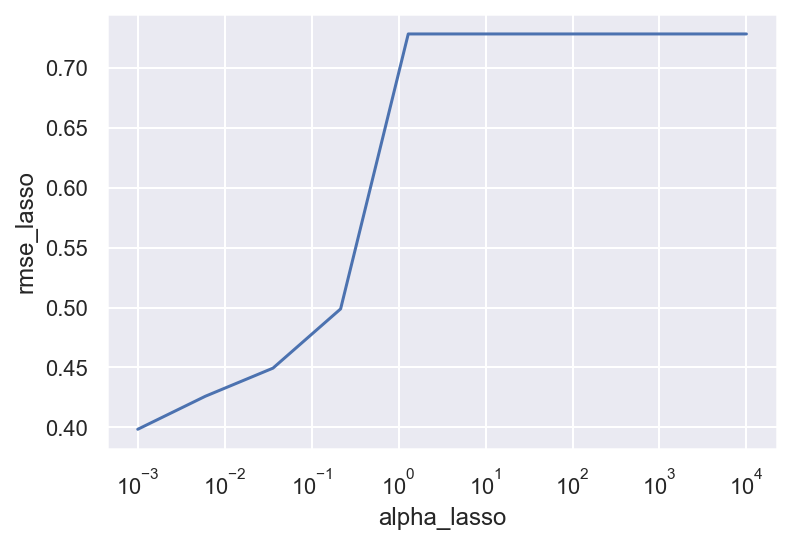

In [72]:
plt.xscale('log')
plt.plot(alphas_lasso, rmse_lasso)
plt.xlabel('alpha_lasso')
plt.ylabel('rmse_lasso')
plt.show()

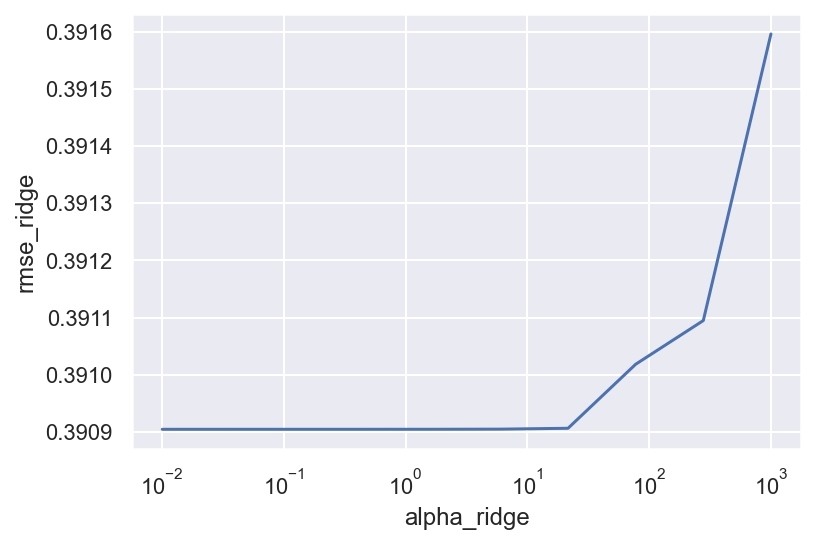

In [73]:
plt.xscale('log')
plt.plot(alphas_ridge, rmse_ridge)
plt.xlabel('alpha_ridge')
plt.ylabel('rmse_ridge')
plt.show()

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

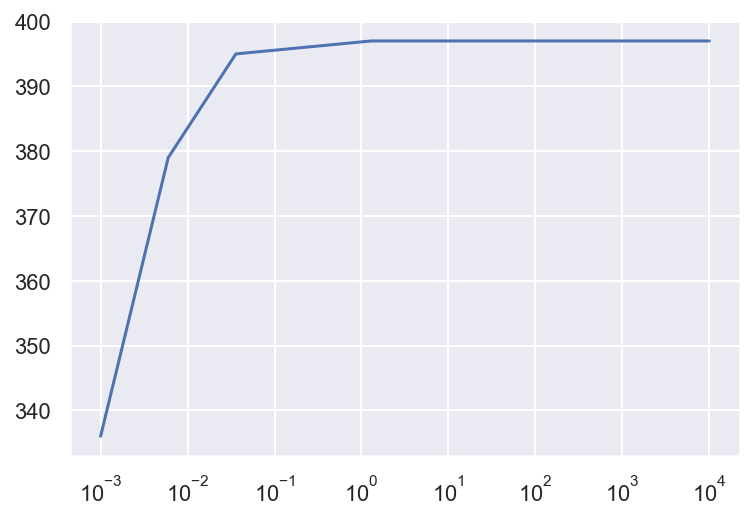

In [74]:
coef = []
for i in range(coef_l.shape[0]):
    coef = np.append(coef_l[i,:].shape[0] - np.count_nonzero(coef_l[i, :]), coef)
plt.plot(alphas_lasso, coef[::-1])
plt.xscale('log')

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут. Если эти признаки будут давать хороший прирост в качестве, то за это могут быть даны дополнительные бонусные баллы.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

Признак потенциальн полезный из-за того, что модель не содержит информации о корреляции признаков квадрата начала и конца поездки. Новый признак как раз добавляет слабой линейной модели признаков (которые составлены из предыдущих), чтобы она имела больше степеней свободы

In [ ]:
j = 0
for X in [X_train, X_test]:
    X = MGT.fit(X_train, y_train).transform(X)
    X['pairs'] = -1
    for i in range(100):
        K = X.groupby(by = ['square_pickup', 'square_dropoff']).pickup_longitude.count().nlargest(100)
        X.update(pd.Series(np.full(K[K.index[i]], i), X[(X['square_pickup'] == 
                                                 K.index[i][0])&(X['square_dropoff'] ==
                                                                 K.index[i][1])].index).rename('pairs'))
    if j == 0:
        X_train['pairs'] = X['pairs']
        j += 1
    else:
        X_test['pairs'] = X['pairs']

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [ ]:
numeric_features = ['log_haversine']

categorical = ['day_of_week', 'hour', 'month','day_of_year', 'is_anomal_1', 'is_anomal_2', 
               'is_traffic_jam', 'is_airport_dropoff', 'is_airport_pickup', 'square_pickup', 
               'square_dropoff', 'vendor_id', 'passenger_count', 'store_and_fwd_flag', 'pairs']

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[('map_grid_transformer', MGT),
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(alpha = 1))
    ])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут). 

манхетенское расстояние полезно потому что мы на манхеттене (вот уж неожиданность), где улицы как раз перпендикулярны друг другу

In [ ]:
m = folium.Map(location=[40.7460, -73.9942], zoom_start=9, tiles="cartodbpositron")
c1 = [[40.7460, -73.9942],[40.7385, -73.9996]]
c2 = [[40.7360, -73.9936],[40.7385, -73.9996]]
line1 = c1
line1.append(line1[0])
line2 = c2
line2.append(line2[0])
m.add_child(folium.PolyLine(locations=line1, weight=7, color="red"))
m.add_child(folium.PolyLine(locations=line2, weight=7, color="red"))

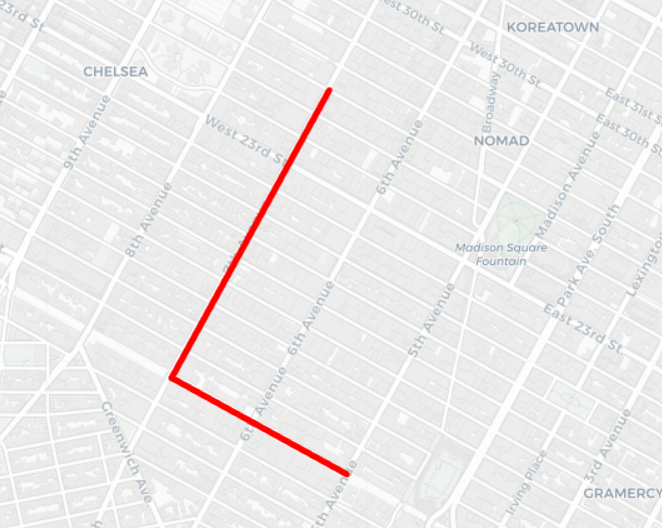

In [ ]:
x1,x2,y1,y2 = df['pickup_latitude'].to_numpy(),df['dropoff_latitude'].to_numpy(),\
            df['pickup_longitude'].to_numpy(),df['dropoff_longitude'].to_numpy() 
theta = np.arctan((y2 - y1),(x2 - x1))
r = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
alpha = 0.46
manhatten = r * (np.abs(np.cos(theta - alpha)) + np.abs(np.sin(theta - alpha)))

In [ ]:
X_train['manhatten'] = manhatten[X_train.index]
X_test['manhatten'] = manhatten[X_test.index]

X_train['log_manhatten'] = np.log1p(manhatten[X_train.index])
X_test['log_manhatten'] = np.log1p(manhatten[X_test.index])

In [ ]:
X_train.corrwith(y_train)[['manhatten', 'log_manhatten', 'log_haversine']]

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [ ]:
numeric_features = ['log_manhatten']

categorical = ['day_of_week', 'hour', 'month','day_of_year', 'is_anomal_1', 'is_anomal_2', 
               'is_traffic_jam', 'is_airport_dropoff', 'is_airport_pickup', 'square_pickup', 
               'square_dropoff', 'vendor_id', 'passenger_count', 'store_and_fwd_flag']

MGT = MapGridTransformer(quantile = 0.997, n_l = 110, n_w = 110)

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[('map_grid_transformer', MGT),
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(alpha = 150))
    ])

In [ ]:
model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

стало хуже тк логарифм манхетена меньше коррелирует с таргетом

**Задание 17 (бонус, 2 балла)**. Реализуйте трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения.

Признаки могут быть самые разные: расстояние между точкой старта и финиша, посчитанное в количестве шестиугольников; статистика по числу поездок и по их продолжительности в соседних шестиугольниках.

Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Измерьте качество после добавления новых признаков. За улучшение функционала ошибки на каждые 0.005 на тестовой выборке будет даваться 0.5 бонусных балла. Можно получить до 2 бонусных баллов за это задание.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.

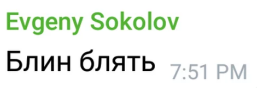